# OLA 4
<img src="./images/cnnimages/catordog.gif" alt="Showcasing objective" title="CatorDog" width="600" />

The project work involves solving the following tasks:
1. Obtaining, importing, and pre-processing of data, appropriate for supervised machine learning - classification of images. We use the data from the following [link](https://github.com/datsoftlyngby/soft2024spring-ai/tree/main/Data/CNN).
2. Building and training a model of convolutional neural network (CNN) for recognition of patterns and classification of images based on these patterns.
3. Validating and testing the model with both labelled and not labelled images.
4. Assessing the quality of the model by means of proper measures and criteria.
5. Discussing the process and the product of the project by answering the questions:
- Based on your experience, how would you define ANN and CNN?
- Which hyper-parameters of the CNN architecture have you fine-tuned?
- Which is the role of the activation functions in ANN? Which of them you have implemented?Illustrate them.
- Can you see any advantages and disadvantages of ANN and CNN used for classification in
comparison to the other classification algorithms you are familiar with? Give some examples.

## Part 1 - ...

In [1]:
import os
os.getcwd()

import sys
sys.version

!python3 -V

#!pip3 install tensorflow --break-system-packages

Python 3.12.3


In [12]:
import glob
from PIL import Image
import cv2
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import random as ran
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'cv2'

In [3]:
# TF Version
tf.__version__

'2.16.1'

In [4]:
train_dir = './data/train'
test_dir = './data/test'

train_list = glob.glob(os.path.join(train_dir,'*.jpg'))
test_list = glob.glob(os.path.join(test_dir, '*.jpg'))

print(f"Train Data: {len(train_list)}")
print(f"Test Data: {len(test_list)}")

Train Data: 25000
Test Data: 12500


In [11]:
CATEGORIES = ["cat", "dog"]

We split the path with dashes e.g.: **./data/train/dog.123.png** and take the last element -1 which is **dog.123.png**. Then we split that as well by dots and get the first element which is the label.

In [5]:
labels = [path.split('/')[-1].split('.')[0] for path in train_list] 
labels[0]

'dog'

# Plotting some random images

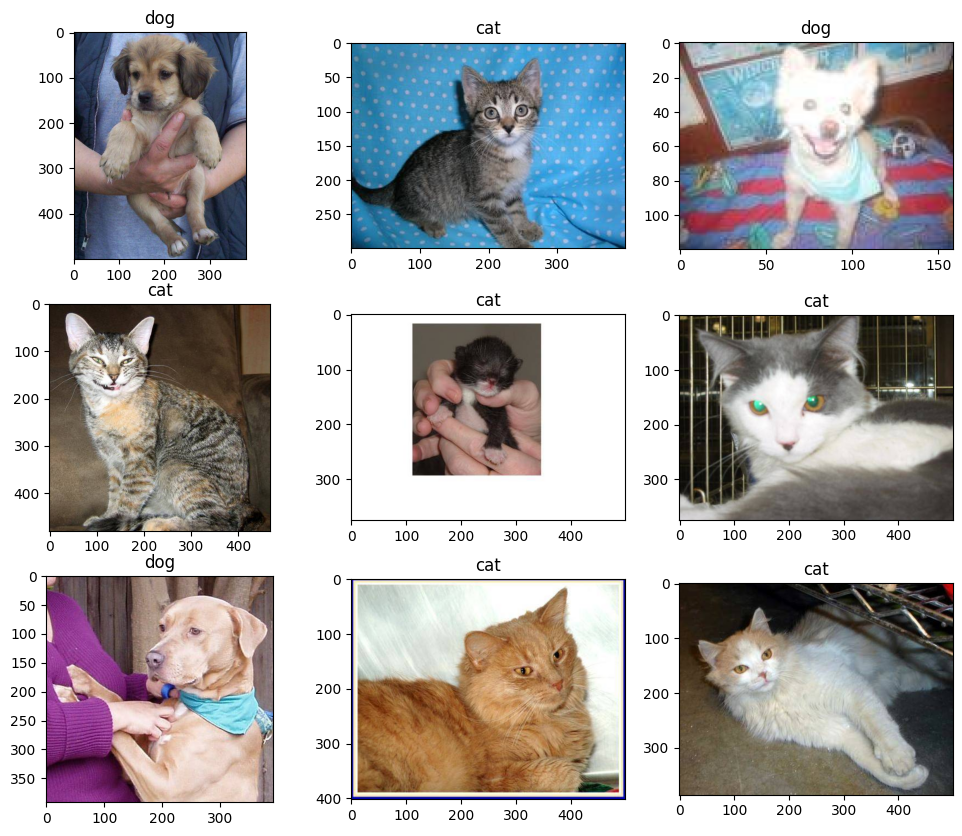

In [6]:
random_idx = np.random.randint(1, len(train_list), size=9)
fig, axes = plt.subplots(3, 3, figsize=(12, 10))

for idx, ax in enumerate(axes.ravel()):
    img = Image.open(train_list[idx])
    ax.set_title(labels[idx])
    ax.imshow(img)

In [7]:
# using sklearn to split the training data. 20% will be validation data.
train_list, valid_list = train_test_split(train_list, 
                                          test_size=0.2,
                                          stratify=labels,
                                          random_state=0)

In [8]:
print(f"Train Data: {len(train_list)}")
print(f"Validation Data: {len(valid_list)}")
print(f"Test Data: {len(test_list)}")

Train Data: 20000
Validation Data: 5000
Test Data: 12500


In [10]:
train_list[0]

'./data/train/dog.2013.jpg'

In our neural network we can have multiple layers where we can do many operations (transfer functions). We can apply techniques to the images: Convolution, Pooling , Padding to optimize and scale down the images.. 
We have input (numbers in matrix) after doing before mentioned operations in the layer then we (multiply the value x to a weight) + bias. Then we run through an activtion function.
Weights must be static in the end, meaning we iterate (back propagate) untill we end up on something stable. 
Depending on the error rate, we either lower them or higher them in increments (learning rate) - this is where e.g. ADAM comes in:
The Adam optimizer, short for “Adaptive Moment Estimation,” is an iterative optimization algorithm used to minimize the loss function during the training of neural networks. One cycle of this is called epocs.

We can chose from different activation functions, we do...